In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.fftpack import fft, ifft
from itertools import chain
from skimage import io
from math import sqrt
import pandas as pd
img = cv2.imread('leaf.png',0)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [40]:
img.shape

(240, 320)

In [41]:
image=img

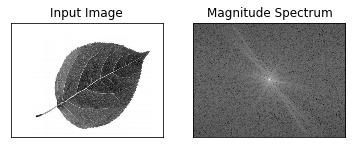

In [42]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [43]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('final_leaf.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))



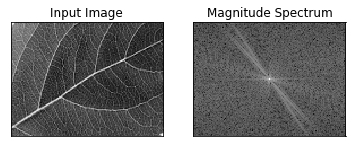

In [44]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

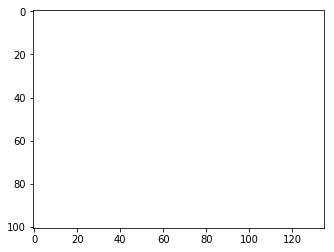

(0, 0) 255


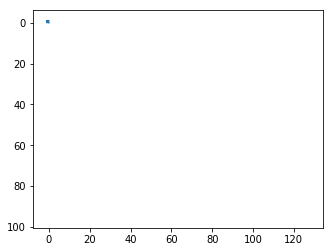

[-3.        -3. j  0.25476272-0.5j -3.15687576-0.5j -0.07919222-0.5j
  0.98130525-0.5j]
5


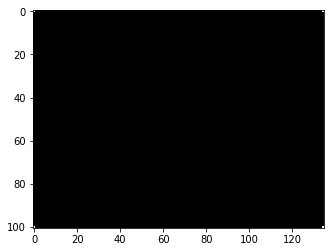

In [45]:

#invert image
(row, col) = img.shape

for i in range(row):
    for j in range(col):
        if img[i,j] == 255:
            img[i,j] = 0
        else:
            img[i,j] = 255

# ret,img = cv2.threshold(image,70,255,0)
#display image
plt.imshow(img, cmap='Greys')
plt.show()

###################### GET CHAIN CODE
for i, row in enumerate(img):
    for j, value in enumerate(row):
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1, # x or columns
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1, # y or rows
               0,      0,
               1,  1,  1]

border = []  # store a list of border points on the image
chain = []   # store a list of chain code for the image
curr_point = start_point
for direction in directions:
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if img[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8 
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if image[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    #if count == 1000: break
    count += 1


#print(count)  # print number of border points of the image
#print(border) # print border points of the image
#print(chain) # print chain code of the image

# display image with the chain code/border points in blue
plt.imshow(img, cmap='Greys')
plt.plot([i[1] for i in border], [i[0] for i in border])
plt.show()


# fft
complex_border = [complex(*point) for point in border]
#print('#########' + str(len(complex_border)))
Y = fft(complex_border)
#Y = Y[:-50]
#print('#########' + str(len(Y)))
print(Y)

# IFFT
X = ifft(Y)
print(len(X))

inverse_img = np.ones(img.shape, img.dtype)*255
for x in X:
    inverse_img[int(x.real), int(x.imag)] = 0

plt.imshow(inverse_img, cmap='Greys')
plt.show()


In [46]:
#FEATURE VECTOR OF THE GIVEN IMAGE

In [47]:
img.shape

(101, 135)

In [48]:
raw = img.flatten()
raw.shape

(13635,)

In [49]:
raw

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [50]:
mean = cv2.mean(img)

In [51]:
mean

(255.0, 0.0, 0.0, 0.0)

In [28]:
(mean, std) = cv2.meanStdDev(img)

In [29]:
mean, std

(array([[127.15518885]]), array([[21.25756557]]))

In [30]:
stat = np.concatenate([mean, std]).flatten()

In [31]:
stat

array([127.15518885,  21.25756557])

In [32]:
#Fourier Descripter of the input image
#For the input image, FFT is applied to get the fourier descripter of the image and the same is displayed 
